# PAINS filtering

> This notebook will implement a class to filter PAINS off a dataset

In [1]:
#hide
%reload_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a 'Marcos Santana' -d -p numpy,pandas,rdkit -v

Author: Marcos Santana

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy : 1.20.1
pandas: 1.2.4
rdkit : 2021.03.5



In [5]:
from rdkit.Chem.FilterCatalog import *
from rdkit import Chem

import pandas as pd
import numpy as np

# Load data

In [6]:
data = pd.read_csv('../data/FXA_CHEMBL.csv')

In [11]:
data.head()
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [14]:
def _pains():
    '''Define PAINS substructures'''
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_B)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_C)
    catalog = FilterCatalog(params)
    return catalog

def pains_filter(mol):
    
    params = _pains()
    
    '''Identify PAINS among a set of molecules
    
    Arguments:
    
    mol : rdchem.Mol or str
    
        RDKit mol object or SMILES representing a molecule
        
    Returns:
        pains_name : str
            PAINS identifier
            
    '''
    
    assert params.GetNumEntries() == 480
    
    try:
        if not isinstance(mol, Chem.rdchem.Mol): mol = Chem.MolFromSmiles(mol)
        entry = params.GetFirstMatch(mol)
        if entry:
            pains_name = entry.GetDescription()
            return pains_name
    except:
        pass

In [15]:
data.loc[:, 'PAINS'] = data['Smiles'].apply(pains_filter)

In [23]:
data[['Smiles','PAINS']]

,Smiles,PAINS
0,O=C1CN(S(=O)(=O)c2cc3ccc(Cl)cc3s2)CCN1Cc1cc2cn...,None
1,O=C(CN1CCN(S(=O)(=O)c2cc3ccc(Cl)cc3s2)CC1=O)NC...,None
2,C[C@H]1CC[C@@H](Oc2cccc(-c3nc4cc(C(=N)N)c(F)cc...,None
3,COc1cccc(S(=O)(=O)Nc2cccn(CC(=O)NCc3ccc(C(=N)N...,None
4,Cc1cc(C(=O)Nc2ccc(-c3ccccc3S(N)(=O)=O)cc2)n(-c...,None
...,...,...
4083,Cc1ccc2c(c1)c(C)c1n2C[C@@](NC(=O)c2c(Cl)cc(-n3...,indol_3yl_alk(461)
4084,N=C(N)c1ccc(CNC(=O)[C@@H]2Cc3ccc(cc3)NC(=O)CCN...,None
4085,NCc1ccc(CNC(=O)[C@@H]2Cc3ccc(cc3)NC(=O)CCN3CCN...,None
4086,N=C(N)c1ccc(Oc2cccc(Oc3ccc(C(=N)N)cc3)n2)cc1,None


**Example**

In [21]:
data.groupby('PAINS')['PAINS'].count()

PAINS
anil_di_alk_A(478)       55
anil_di_alk_C(246)       24
anil_di_alk_E(186)       30
anil_no_alk(40)          18
catechol_A(92)            7
dyes5A(27)                2
ene_one_ene_A(57)        49
het_pyridiniums_A(39)     1
indol_3yl_alk(461)       10
mannich_A(296)           12
quinone_A(370)            5
thiophene_hydroxy(28)     1
Name: PAINS, dtype: int64

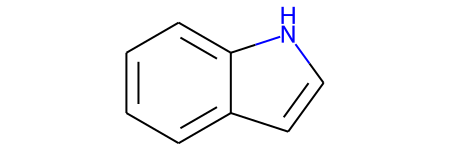

In [66]:
patt = Chem.MolFromSmiles('c1ccc2[nH]ccc2c1') # indol_3yl_alk(461)
patt

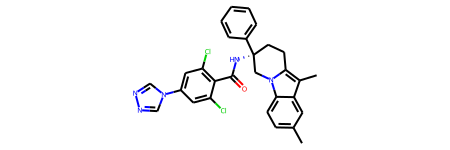

In [67]:
mol = Chem.MolFromSmiles(data.iloc[4083]['Smiles'])

((1, 2, 3, 4, 10, 9, 7, 5, 6),)


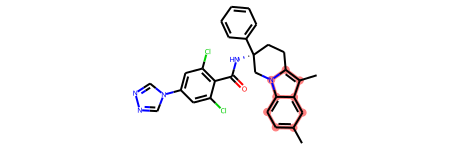

In [70]:
print(mol.GetSubstructMatches(patt))
mol